In [1]:
%load_ext autoreload

In [5]:
%autoreload 2
import sys
import os
sys.path.append('..')
import guitarsounds
from guitarsounds import Sound, SoundPack

# guitarsounds API tutorial

The API documentation can be found at [this link](https://olivecha.github.io/guitarsounds/).

The example files can be downloaded from the [github](https://github.com/olivecha/guitarsounds/tree/main/example_sounds)  Repository.

## Loading a sound and analyzing it

The `Sound` class can be used to load a .wav soundfile, and perform any analysis on it.

In [54]:
# Loading a wood guitar low E string sound from the examples sounds
sound_path = os.path.join('..', 'example_sounds', 'Wood_Guitar', 'Wood_E1.wav')
# the name of the sound and fundamental can be user specified
mysound = Sound(sound_path, name='wood', fundamental=330)

### Testing the sound loading

The `Sound` class contains multiple signals (`raw_signal`, `bins`, ...). The main signal is under the attribute `.signal`, so the listen method has to be called on this signal.  When the plot methods are called from the `Sound` class, they are a shorthand to call them on the main signal. `Sound.plot.signal()` is equivalent to `Sound.signal.plot.signal()`.

So here we plot the sound signal and listen to it : 

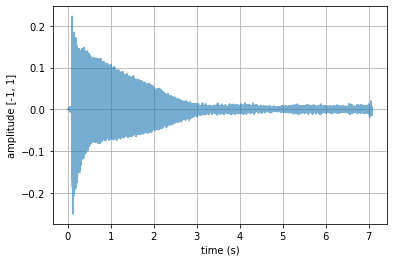

In [5]:
mysound.signal.listen()  # creates the listening box

mysound.plot.signal() # creates the signal plot

## Analyzing the sound

The description of the available analysis plots can be found by typing `help(mysound.signal.plot)`.


In [ ]:
help(mysound.signal.plot)

For example, we can plot the envelop, and the normalized envelop of the signal : 

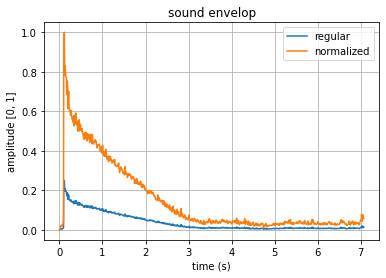

In [10]:
# regular plot
mysound.plot.envelope(label='regular')

# normalized plot by calling .normalize() after the signal
mysound.signal.normalize().plot.envelope(label='normalized')  
# matplotlib key word arguments can be passed to plot methods (label = 'normalized')

# The matplotlib module can be used to customize the plot
import matplotlib.pyplot as plt
plt.legend()
plt.title('sound envelop')
plt.show()

### Some advanced analysis functions

The damping ratio of every Fourier transform peak can be computed for a sound.

In [60]:
mysound.peak_damping()

  Frequency (Hz)    Damping ratio (%)
----------------  -------------------
         328.695           0.0554066
         657.108           0.0235511
         985.521           0.0196814
        1314.36            0.00964455
        1642.91            0.0113576
        1971.89            0.0198335


We can also visualize the peaks found by the peak-finding algorithm.

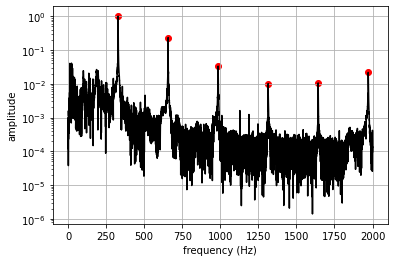

In [61]:
mysound.plot.peaks()

The analysis functions applied to the divided frequency bins of the sound are called from the `Sound` class.

Text(0.5, 1.0, 'Bin power distribution')

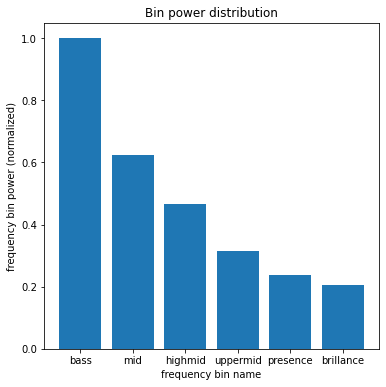

In [11]:
# Fequency bin power histogram
mysound.bin_hist()
# adding a title
plt.title('Bin power distribution')

The signals associated to the frequency bins are stored in the `Sound` class as their name.

In [58]:
# Listen to the mid frequency interval of the sound
mysound.mid.listen()

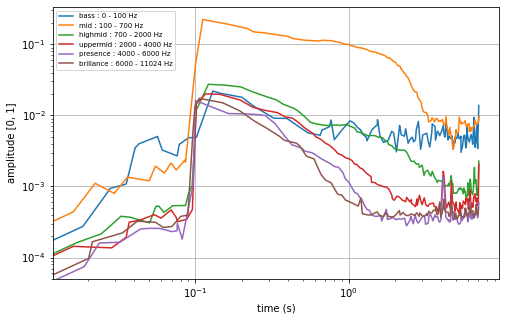

In [63]:
# A plot of the logarithmic envelop for every bin in the Sound
plt.figure(figsize=(8,5))
mysound.plot_freq_bins()

We can listen to the bass sound to see why the amplitude drops before the onset

In [64]:
# normalizing so the sound is louder
mysound.bass.normalize().listen()

When considering the low fundamental frequency (82Hz), the signal only has about 8 oscillations between 0 and 0.1s. This could be the 
cause of the not clearly defined onset.

## Sound parameters

The parameters used to analyze the sounds can be changed in the class created by the `guitarsounds.analysis.sound_parameters` function.

For example : 

In [65]:
# displaying info for all the parameters
parameters = guitarsounds.parameters.sound_parameters()
parameters.more_info()

general
	 octave_fraction : 3 [Fraction of the octave used for octave computations]
	 fft_range : 2000 [Maximum frequency in the Fourier transform plot]
onset
	 onset_delay : 100 [Delay before the onset (attack) in milliseconds to keep when trimming the signal]
	 onset_time : 0.005 [Time interval used to detect the onset in seconds]
envelope
	 frame_size : 301 [Number of samples in the array used to compute a point of the envelope]
	 hop_length : 200 [Number of samples between envelope points]
log_envelope
	 start_time : 0.01 [First point in the log scale envelope]
	 min_window : None [Minimum window size for the log envelope computed from start_time by default]
	 max_window : 2048 [Maximum window size for the log envelope in samples]
fundamental
	 min_freq : 60 [Minimum frequency for the fundamental finding algorithm (Hz)]
	 max_freq : 2000 [Maximum frequency for the fundamental finding algorithm (Hz)]
	 frame_length : 1024 [Frame length in samples to compute the fundamentals in the s

In [69]:
# changing the Fourier transform max range from 2000 Hz to 3000 Hz
parameters.change('fft_range', 3000)

In [70]:
# info function without descriptions
parameters.info()

general
	 octave_fraction : 3
	 fft_range : 3000
onset
	 onset_delay : 100
	 onset_time : 0.005
envelope
	 frame_size : 301
	 hop_length : 200
log_envelope
	 start_time : 0.01
	 min_window : None
	 max_window : 2048
fundamental
	 min_freq : 60
	 max_freq : 2000
	 frame_length : 1024
bins
	 bass : 100
	 mid : 700
	 highmid : 2000
	 uppermid : 4000
	 presence : 6000
damping
	 lower_threshold : 0.05
trim
	 E2 : 4.0
	 A2 : 3.5
	 D3 : 3.5
	 G3 : 3.0
	 B3 : 3.0
	 E4 : 2.5


The modified sound parameters can be used in the instanciation of a `Sound` class

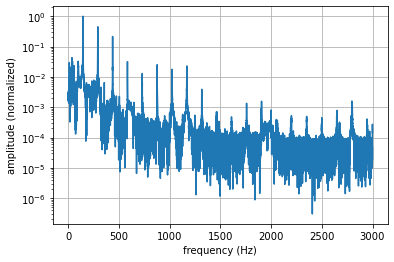

In [72]:
new_param_sound = Sound(os.path.join('..', 'example_sounds', 'Wood_Guitar', 'Wood_D4.wav'), SoundParams=parameters)

new_param_sound.plot.fft()

Once the `Sound` instance is created the SP attribute can be changed to modify the parameters locally.

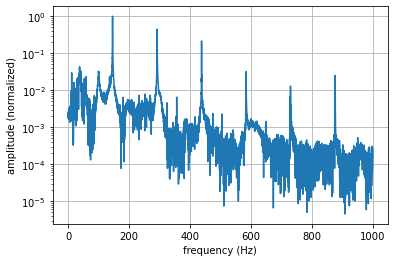

In [73]:
new_param_sound.SP.change('fft_range', 1000)
new_param_sound.plot.fft()

## Analysing multiple sounds
Let's load a second sound from the carbon guitar data set and combine it with the first sound into a soundpack.


In [87]:
# here we let the package compute the fundamental frequency
sound_path = os.path.join('..', 'example_sounds', 'Carbon_Guitar', 'Carbon_E1.wav')
mysound_carbon = Sound(sound_path, name='carbon') 
mysound_carbon.signal.listen()

### Combining two sounds for analysis

Two or more sounds can be combined into a `SoundPack` to analyze them comparatively.

In [75]:
# creating a soundpack from two sounds
mypack = SoundPack(mysound, mysound_carbon)

### Dual sound analysis

A set of methods from the `SoundPack` object can be applied to compare the two sounds, see `help(SoundPack)`.

Some methods are only available for SoundPacks with two sounds.

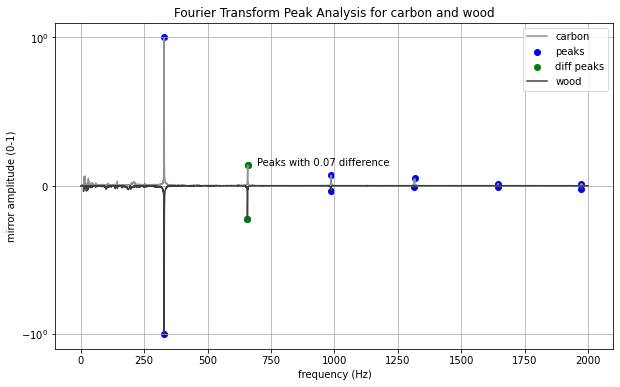

In [79]:
# a method to compare the Fourier transform peaks of the two signals.
mypack.compare_peaks()
# here the second peaks have a 0.07 difference, so the carbon sound signal would have a slightly lower amplitude
# aroud 660 Hz

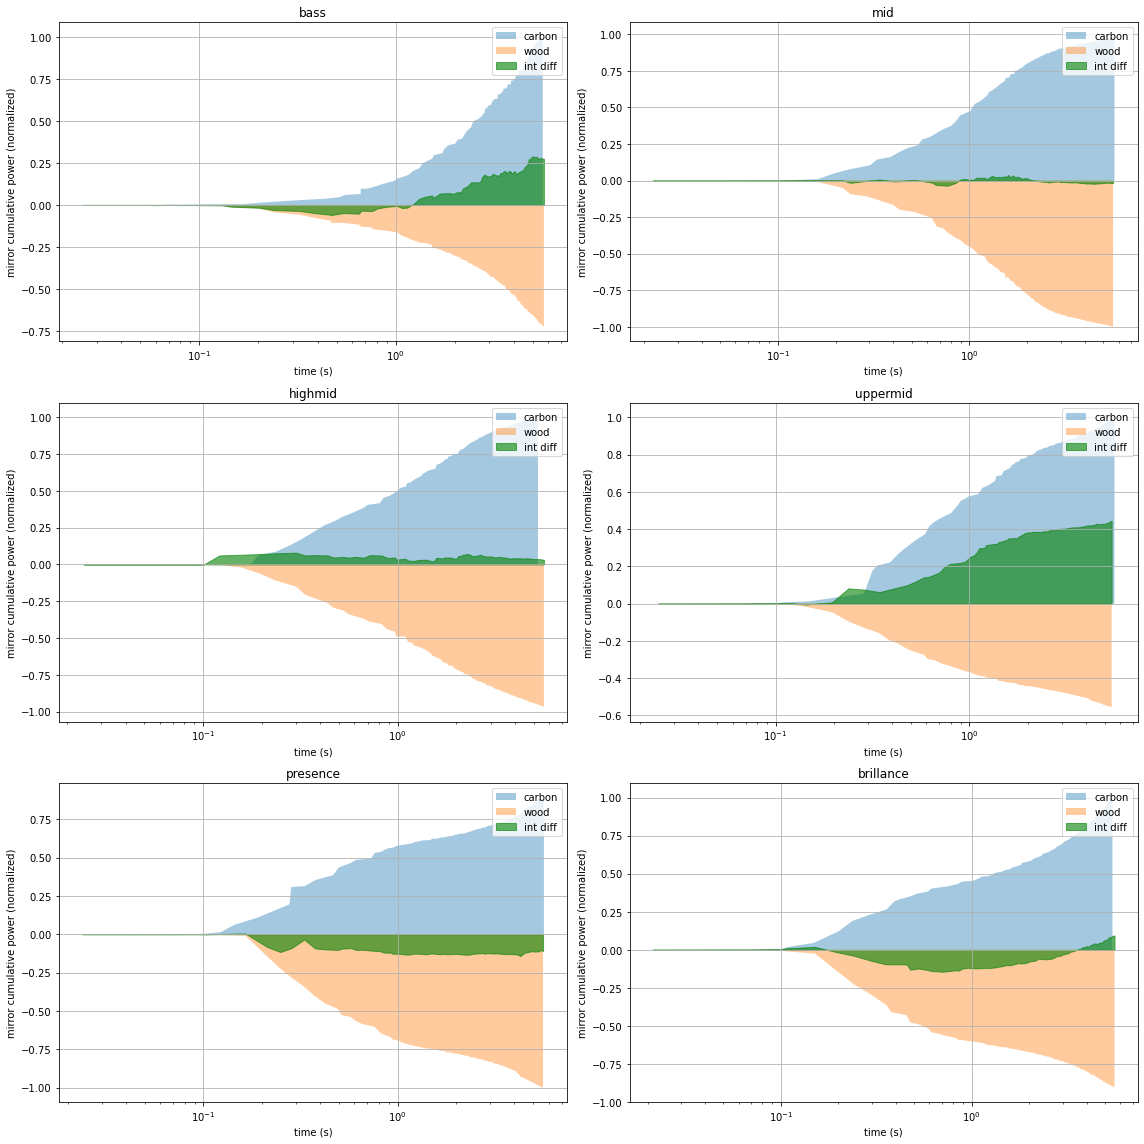

In [80]:
# Comparing the cumulative power in every frequency bin
mypack.integral_compare()

# For example, the bass signal decays faster for the wood guitar.

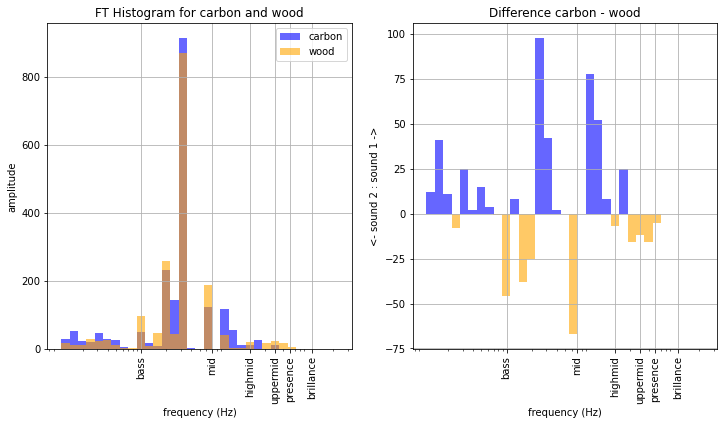

In [81]:
# difference between the fourier transforms of the two signals
mypack.fft_diff(ticks='bins') # using frequency bins as ticks
plt.show()

## Comparing a higher number of sounds

The SoundPack object can be created using an arbitrary number of sounds. 

It can also be constructed directly from file names.

Here we create a SoundPack containing a signal for every string of the wood guitar. The order of the sounds is not important as they are sorted according to their fundamental.

In [82]:
# a list of files
files_root = os.path.join('..', 'example_sounds', 'Wood_Guitar')
files = [os.path.join(files_root, 'Wood_A5.wav'),
         os.path.join(files_root, 'Wood_B2.wav'),
         os.path.join(files_root, 'Wood_D4.wav'),
         os.path.join(files_root, 'Wood_E1.wav'),
         os.path.join(files_root, 'Wood_E6.wav'),
         os.path.join(files_root, 'Wood_G3.wav'), ]

# a list of names for the sounds
names = ['A5', 'B2', 'D4', 'E1', 'E6', 'G3']

# names are assigned when creating the soundpack
wood_pack = SoundPack(files, names=names)

### analysis for multiples sounds

Lets compute various features for the six sounds.

In [83]:
# a table containing the normalized signal power of every frequency bin
wood_pack.bin_power_table()

___ Signal Power Frequency Bin Distribution ___ 

bin              E6        G3        B2        A5        D4        E1
---------  --------  --------  --------  --------  --------  --------
bass       2.25422   0.668373  0.482702  0.743421  0.531284  1.44405
mid        1.04777   0.260829  0.564792  1.33612   1.4854    1.08366
highmid    0.653077  0.742676  0.795559  1.25073   0.74232   0.792575
uppermid   0.471763  0.515215  0.482005  0.325364  0.424636  0.52429
presence   0.257149  0.38698   0.499191  0.622666  0.376608  0.388866
brillance  1.53109   1.15115   0.474561  1.05354   0.501545  0.337462


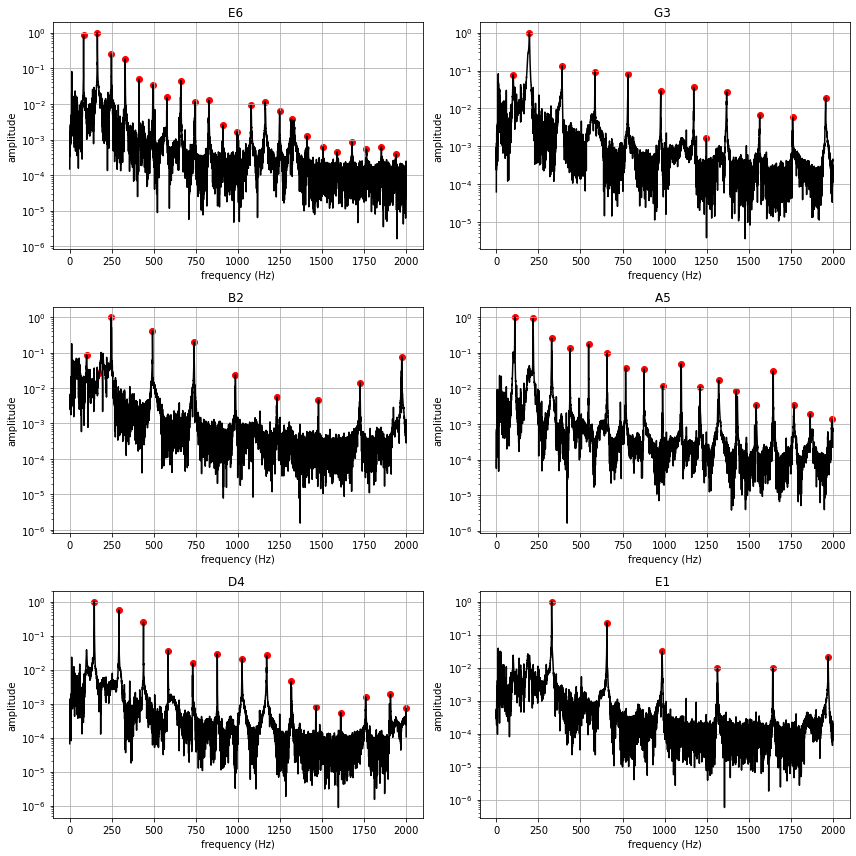

In [84]:
# A plot for every signal
wood_pack.compare_plot('peaks')
plt.show()

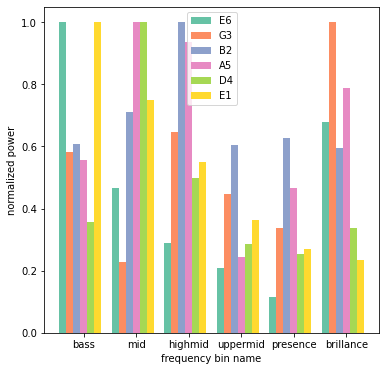

In [85]:
# bin power histogram 
wood_pack.bin_power_hist()
plt.show()

### Using the `guitarsounds` API to compute new features

As an example, the cumulative fourier transform from [Lee and Peters](https://arxiv.org/pdf/0901.3708.pdf) can be computed and plotted using `guitarsounds`, `numpy` and `matplotlib` :

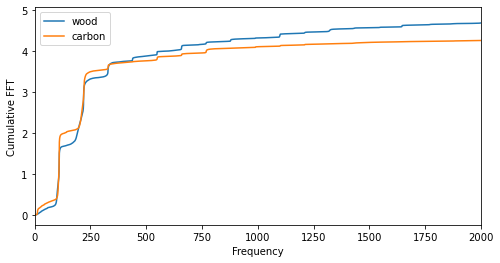

In [86]:
import numpy as np
import matplotlib.pyplot as plt
import guitarsounds

sound1 = guitarsounds.Sound('../example_sounds/Wood_Guitar/Wood_A5.wav')
sound2 = guitarsounds.Sound('../example_sounds/Carbon_Guitar/Carbon_A5.wav')

def cummul_fft(fft, fft_freqs, max_freq=4000):
    """ Cummulative fast fourier transform """
    max_idx = np.nonzero(fft_freqs>max_freq)[0][0]
    cummul_fft = [np.trapz(fft[0:i], fft_freqs[0:i]) for i in range(1, max_idx+1)]
    cummul_freqs = fft_freqs[1:max_idx+1]
    return cummul_freqs, cummul_fft

fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(*cummul_fft(sound1.signal.fft(), sound1.signal.fft_frequencies()), label='wood')
ax.plot(*cummul_fft(sound2.signal.fft(), sound2.signal.fft_frequencies()), label='carbon')
ax.set_xlim(0, 2000)
ax.set_xlabel('Frequency')
ax.set_ylabel('Cumulative FFT')
ax.legend()
plt.show()